In [1]:
!git clone https://github.com/unknown-ap/cse151a_group_project.git

Cloning into 'cse151a_group_project'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 66 (delta 28), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (66/66), 7.33 MiB | 9.11 MiB/s, done.
Resolving deltas: 100% (28/28), done.


## Data Exploration

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


df = pd.read_csv('cse151a_group_project/Cleaned-Life-Exp.csv')
print(df.head())

       Country      Year    Status  Life expectancy  Adult Mortality  \
0  Afghanistan  1.621762 -0.459399        -0.443691         0.790238   
1  Afghanistan  1.404986 -0.459399        -0.979279         0.854614   
2  Afghanistan  1.188210 -0.459399        -0.979279         0.830473   
3  Afghanistan  0.971434 -0.459399        -1.021286         0.862660   
4  Afghanistan  0.754658 -0.459399        -1.052791         0.886801   

   infant deaths   Alcohol  percentage expenditure  Hepatitis B   Measles  \
0       0.268824 -1.133571               -0.335570    -0.635971 -0.110384   
1       0.285786 -1.133571               -0.334441    -0.755661 -0.168124   
2       0.302749 -1.133571               -0.334594    -0.675868 -0.173531   
3       0.328193 -1.133571               -0.332096    -0.556178  0.032045   
4       0.345155 -1.133571               -0.367862    -0.516281  0.051757   

   ...     Polio  Total expenditure  Diphtheria  HIV/AIDS       GDP  \
0  ... -3.268019           0.8894

In [3]:
df.shape

(2938, 22)

2938 Rows is not as large as what we would ideally have, but this data is large enough for use to hopefully train a fairly solid model. Also, since the data is collected as statistics based off of a population of people rather than each row just being one person, this data should reflect true values very well.

In [4]:
df.describe()

Year        Status  Life expectancy  Adult Mortality  \
count  2.938000e+03  2.938000e+03      2938.000000      2938.000000   
mean   2.369453e-14  1.233413e-16         0.000128        -0.000375   
std    1.000170e+00  1.000170e+00         0.999561         0.998839   
min   -1.629878e+00 -4.593985e-01        -3.457687        -1.318060   
25%   -7.627743e-01 -4.593985e-01        -0.643224        -0.730634   
50%    1.043299e-01 -4.593985e-01         0.301932        -0.167348   
75%    9.714341e-01 -4.593985e-01         0.677369         0.506583   
max    1.621762e+00  2.176759e+00         2.076724         4.491830   

       infant deaths      Alcohol  percentage expenditure  Hepatitis B  \
count    2938.000000  2938.000000            2.938000e+03  2938.000000   
mean        0.000000    -0.019624            5.320606e-17    -0.107042   
std         1.000170     0.985558            1.000170e+00     1.007555   
min        -0.257017    -1.767049           -3.714329e-01    -3.189357   
25%        -0.257017    -0.899100           -3.690756e-01    -0.396359   
50%        -0.231573    -0.240113           -3.387736e-01     0.311926   
75%        -0.070428     0.729856           -1.492859e-01     0.600825   
max        15.009326     3.274483            9.429403e+00     0.804604   

            Measles          BMI  ...        Polio  Total expenditure  \
count  2.938000e+03  2938.000000  ...  2938.000000        2938.000000   
mean   2.902149e-17    -0.012049  ...    -0.005423          -0.002649   
std    1.000170e+00     1.002242  ...     1.000026           0.967425   
min   -2.110357e-01    -1.862284  ...    -3.396093          -2.229185   
25%   -2.110357e-01    -0.957869  ...    -0.236944          -0.631817   
50%   -2.095530e-01     0.233464  ...     0.446115          -0.067333   
75%   -1.796149e-01     0.887138  ...     0.616880           0.585225   
max    1.829547e+01     2.443979  ...     0.702262           4.668722   

        Diphtheria      HIV/AIDS          GDP   Population  \
count  2938.000000  2.938000e+03  2938.000000  2938.000000   
mean     -0.005636 -9.673829e-18    -0.058679    -0.010227   
std       1.000254  1.000170e+00     0.932894     0.885175   
min      -3.387365 -3.234448e-01    -0.827823    -0.479363   
25%      -0.182352 -3.234448e-01    -0.492302    -0.203358   
50%       0.450217 -3.234448e-01    -0.393025    -0.162123   
75%       0.618901 -1.855659e-01    -0.164617    -0.046133   
max       0.703244  9.623530e+00     7.828360    21.002167   

       thinness  1-19 years  thinness 5-9 years  \
count           2938.000000         2938.000000   
mean               0.008753            0.008346   
std                0.998222            0.997877   
min               -1.072469           -1.058164   
25%               -0.733059           -0.725430   
50%               -0.325767           -0.326150   
75%                0.547126            0.538959   
max                5.172675            5.263781   

       Income composition of resources    Schooling  
count                      2938.000000  2938.000000  
mean                         -0.009392    -0.004486  
std                           1.002607     1.008433  
min                          -2.976073    -3.571075  
25%                          -0.661801    -0.593391  
50%                           0.225020     0.091477  
75%                           0.722968     0.687013  
max                           1.704457     2.592731  

[8 rows x 21 columns]

### Scale
As above, the scale of the data seems to be a bit weird, as the dataset was already scaled in some manner before we acquired it. We will be re-scaling the data using min max normalization so that all features are between 0 and 1 and we can effectively compare our weights.

### Column Descriptions
The columns describe various factors that (intuitively) would impact life expentancy, columns like 'Measles' or 'Polio'

In [5]:
df.dtypes

Country                             object
Year                               float64
Status                             float64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                      float64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                            float64
BMI                                float64
under-five deaths                  float64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

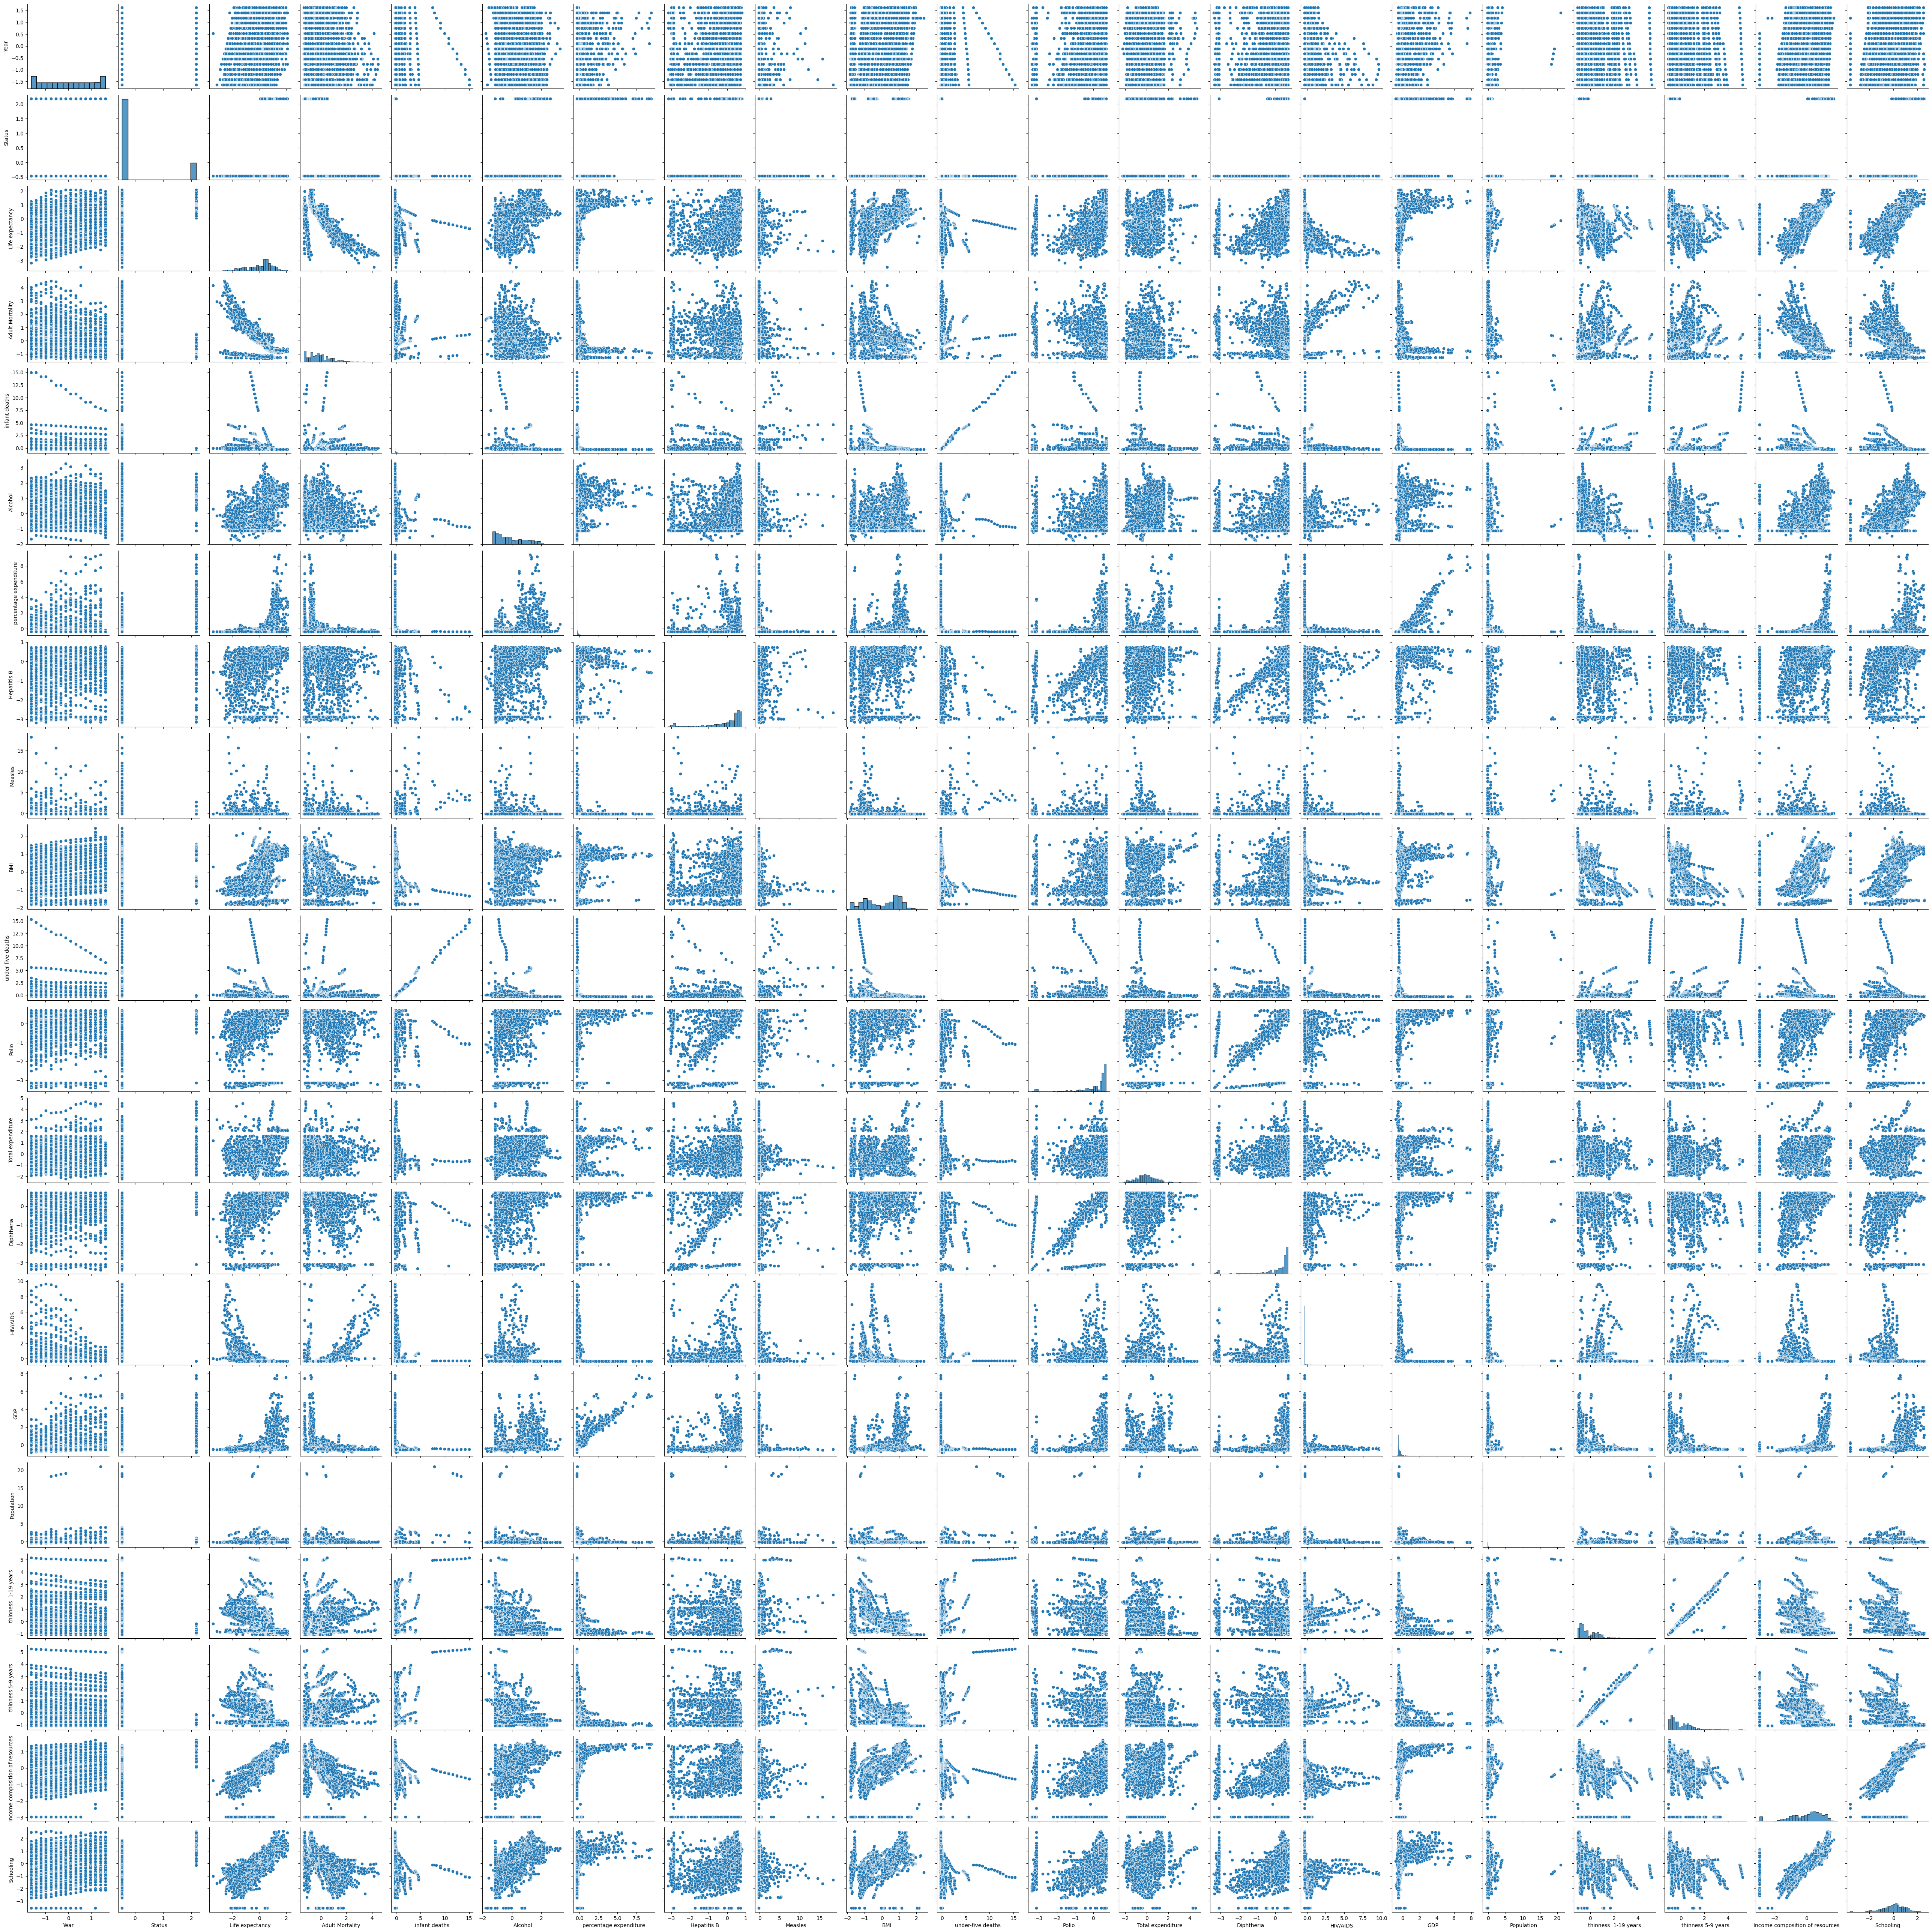

In [6]:
sns.pairplot(df)

**There seem to be some correlations between features as shown through these plots. For example, there seems to be a positive linear correlation between "under-five deaths" and "infant deaths", which is expected.**

array([<Axes: title={'center': 'Schooling'}>], dtype=object)

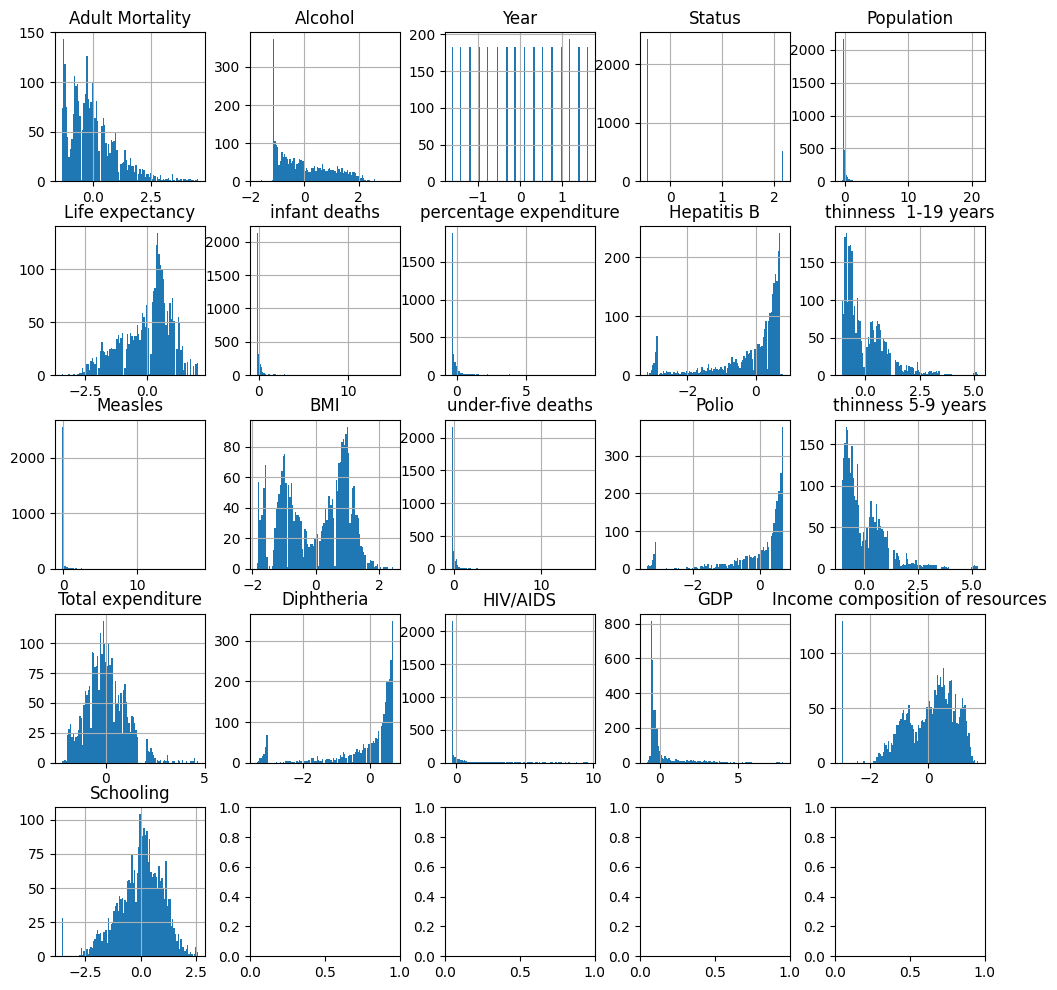

In [7]:
fig, axes = plt.subplots(5, 5, figsize=(12, 12))

df.hist('Adult Mortality', bins=100, ax=axes[0,0])
df.hist('Alcohol', bins=100, ax=axes[0,1])
df.hist('Year', bins=100, ax=axes[0,2])
df.hist('Status', bins=100, ax=axes[0,3])
df.hist('Population', bins=100, ax=axes[0,4])


df.hist('Life expectancy', bins=100, ax=axes[1,0])
df.hist('infant deaths', bins=100, ax=axes[1,1])
df.hist('percentage expenditure', bins=100, ax=axes[1,2])
df.hist('Hepatitis B', bins=100, ax=axes[1,3])
df.hist('thinness  1-19 years', bins=100, ax=axes[1,4])


df.hist('Measles', bins=100, ax=axes[2,0])
df.hist('BMI', bins=100, ax=axes[2,1])
df.hist('under-five deaths', bins=100, ax=axes[2,2])
df.hist('Polio', bins=100, ax=axes[2,3])
df.hist('thinness 5-9 years', bins=100, ax=axes[2,4])


df.hist('Total expenditure', bins=100, ax=axes[3,0])
df.hist('Diphtheria', bins=100, ax=axes[3,1])
df.hist('HIV/AIDS', bins=100, ax=axes[3,2])
df.hist('GDP', bins=100, ax=axes[3,3])
df.hist('Income composition of resources', bins=100, ax=axes[3,4])

df.hist('Schooling', bins=100, ax=axes[4,0])


## Distribution
Many of these features don't seem to be normally distributed, which is why we want to use min-max normalization. We are currently thinking that we will ignore the 'country' column since it's string data and we have a long list of features without it, although we might want to use some form of endcoding to encapsulate the country into our model as well.
There appear to be some outliers in some of the features, for example in the HIV/AIDS plot or or the Total Expenditure column.

In [8]:
df = pd.read_csv('cse151a_group_project/Cleaned-Life-Exp.csv')
df = df.dropna()
df = df.drop(columns=["Country"])
print(df.head())
# print(tempdf.shape)
print("Data contains 2938 observations, 22 features after dropping data rows with null data")

       Year    Status  Life expectancy  Adult Mortality  infant deaths  \
0  1.621762 -0.459399        -0.443691         0.790238       0.268824   
1  1.404986 -0.459399        -0.979279         0.854614       0.285786   
2  1.188210 -0.459399        -0.979279         0.830473       0.302749   
3  0.971434 -0.459399        -1.021286         0.862660       0.328193   
4  0.754658 -0.459399        -1.052791         0.886801       0.345155   

    Alcohol  percentage expenditure  Hepatitis B   Measles       BMI  ...  \
0 -1.133571               -0.335570    -0.635971 -0.110384 -0.959116  ...   
1 -1.133571               -0.334441    -0.755661 -0.168124 -0.984066  ...   
2 -1.133571               -0.334594    -0.675868 -0.173531 -1.009015  ...   
3 -1.133571               -0.332096    -0.556178  0.032045 -1.033964  ...   
4 -1.133571               -0.367862    -0.516281  0.051757 -1.053924  ...   

      Polio  Total expenditure  Diphtheria  HIV/AIDS       GDP  Population  \
0 -3.268019   

In [9]:
print("No missing data exists in our data")

No missing data exists in our data


## Preprocessing Data

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
columnNames = ["infant deaths", "Alcohol", "percentage expenditure", "Hepatitis B", "Measles", "BMI",
               "under-five deaths", "Polio", "Total expenditure", "Diphtheria", "HIV/AIDS", "GDP", "Population",
               "thinness 1-19 years", "thinness 5-9 years", "Income composition of resources", "Schooling", "Year",
               "Status", "Life expectancy", "Adult Mortality"]
normdf = pd.DataFrame(scaler.fit_transform(df), columns=columnNames)
normdf.describe()

infant deaths      Alcohol  percentage expenditure  Hepatitis B  \
count    2938.000000  2938.000000             2938.000000  2938.000000   
mean        0.501248     0.174268                0.624785     0.226800   
std         0.307589     0.379405                0.180608     0.171920   
min         0.000000     0.000000                0.000000     0.000000   
25%         0.266667     0.000000                0.508539     0.101108   
50%         0.533333     0.000000                0.679317     0.198061   
75%         0.800000     0.000000                0.747154     0.314058   
max         1.000000     1.000000                1.000000     1.000000   

           Measles          BMI  under-five deaths        Polio  \
count  2938.000000  2938.000000        2938.000000  2938.000000   
mean      0.016836     0.346606           0.037898     0.771744   
std       0.065515     0.195488           0.102049     0.252270   
min       0.000000     0.000000           0.000000     0.000000   
25%       0.000000     0.172160           0.000241     0.699305   
50%       0.001667     0.302871           0.003332     0.876644   
75%       0.012222     0.495267           0.022666     0.948978   
max       1.000000     1.000000           1.000000     1.000000   

       Total expenditure   Diphtheria  ...          GDP   Population  \
count        2938.000000  2938.000000  ...  2938.000000  2938.000000   
mean            0.011403     0.429661  ...     0.827325     0.322784   
std             0.054044     0.232741  ...     0.244007     0.140249   
min             0.000000     0.000000  ...     0.000000     0.000000   
25%             0.000000     0.210023  ...     0.770833     0.231573   
50%             0.000080     0.486674  ...     0.937500     0.313407   
75%             0.001698     0.638470  ...     0.979167     0.408009   
max             1.000000     1.000000  ...     1.000000     1.000000   

       thinness 1-19 years  thinness 5-9 years  \
count          2938.000000         2938.000000   
mean              0.826706            0.032517   
std               0.244524            0.100550   
min               0.000000            0.000000   
25%               0.783505            0.000000   
50%               0.938144            0.000000   
75%               0.979381            0.013861   
max               1.000000            1.000000   

       Income composition of resources    Schooling         Year       Status  \
count                      2938.000000  2938.000000  2938.000000  2938.000000   
mean                          0.088855     0.021839     0.173130     0.168700   
std                           0.107772     0.041206     0.159840     0.157843   
min                           0.000000     0.000000     0.000000     0.000000   
25%                           0.038761     0.012848     0.054348     0.052632   
50%                           0.050230     0.014768     0.119565     0.115789   
75%                           0.076616     0.020168     0.259337     0.252632   
max                           1.000000     1.000000     1.000000     1.000000   

       Life expectancy  Adult Mortality  
count      2938.000000      2938.000000  
mean          0.633834         0.578634  
std           0.214208         0.163606  
min           0.000000         0.000000  
25%           0.494447         0.483092  
50%           0.683917         0.594203  
75%           0.790304         0.690821  
max           1.000000         1.000000  

[8 rows x 21 columns]

## Splitting Data

In [12]:
normFeatures = normdf.drop(columns=["Life expectancy"])
normOutput = normdf["Life expectancy"]
X_train, X_test, y_train, y_test = train_test_split(normFeatures, normOutput, test_size=0.2, random_state = 4)

In [13]:
X_train.head()

infant deaths  Alcohol  percentage expenditure  Hepatitis B   Measles  \
1059       0.933333      0.0                0.671727     0.257618  0.005556   
2516       0.266667      1.0                0.886148     0.008310  0.000000   
1304       0.600000      0.0                0.728653     0.195291  0.000556   
736        0.000000      0.0                0.284630     0.477839  0.125556   
2310       0.133333      0.0                0.222011     0.709141  0.016667   

           BMI  under-five deaths     Polio  Total expenditure  Diphtheria  \
1059  0.217199           0.033754  0.719226           0.000000    0.566628   
2516  0.448270           0.297402  0.852044           0.000024    0.624565   
1304  0.288185           0.012100  0.079914           0.000000    0.564311   
736   0.222095           0.000000  0.169624           0.039032    0.161066   
2310  0.323922           0.001878  0.533601           0.002677    0.195829   

      HIV/AIDS       GDP  Population  thinness 1-19 years  thinness 5-9 years  \
1059    0.0052  0.645833    0.338363             0.731959            0.005941   
2516    0.0000  1.000000    0.553105             1.000000            0.000000   
1304    0.0004  0.062500    0.278003             0.072165            0.009901   
736     0.1328  0.406250    0.062681             0.020619            0.047525   
2310    0.0192  0.531250    0.672664             0.525773            0.031683   

      Income composition of resources  Schooling      Year    Status  \
1059                         0.064902   0.024734  0.039855  0.038596   
2516                         0.378702   0.019446  0.043478  0.042105   
1304                         0.069806   0.012604  0.065217  0.056140   
736                          0.031587   0.051009  0.445652  0.428070   
2310                         0.037065   0.016365  0.355072  0.031579   

      Adult Mortality  
1059         0.516908  
2516         0.772947  
1304         0.613527  
736          0.274378  
2310         0.347826

In [14]:
X_test.head()

infant deaths  Alcohol  percentage expenditure  Hepatitis B   Measles  \
90         0.333333      0.0                0.732448     0.174515  0.006111   
330        0.333333      0.0                0.734345     0.015235  0.000000   
1657       0.600000      0.0                0.481973     0.296399  0.004444   
2083       0.200000      0.0                0.762808     0.116343  0.000000   
2228       0.266667      0.0                0.521822     0.308864  0.000000   

           BMI  under-five deaths     Polio  Total expenditure  Diphtheria  \
90    0.493798           0.004937  0.869064           0.000000    0.647740   
330   0.348400           0.002347  0.919011           0.000108    0.052144   
1657  0.125652           0.000572  0.629322           0.001518    0.298957   
2083  0.174118           0.207905  0.919011           0.000113    0.738123   
2228  0.408126           0.000463  0.059935           0.000000    0.252607   

      HIV/AIDS       GDP  Population  thinness 1-19 years  thinness 5-9 years  \
90      0.0048  0.958333    0.376088             0.989691            0.000000   
330     0.0000  0.958333    0.471851             0.938144            0.000000   
1657    0.0048  0.625000    0.198491             0.639175            0.021782   
2083    0.0000  0.937500    0.218804             0.927835            0.000000   
2228    0.0000  1.000000    0.555427             0.969072            0.029703   

      Income composition of resources  Schooling      Year    Status  \
90                           0.039713   0.042456  0.036232  0.031579   
330                          0.059077   0.012871  0.101449  0.098246   
1657                         0.036230   0.012854  0.318841  0.301754   
2083                         0.311777   0.019290  0.170290  0.154386   
2228                         0.040656   0.012698  0.257246  0.249123   

      Adult Mortality  
90           0.787440  
330          0.603865  
1657         0.342995  
2083         0.618357  
2228         0.473430

In [15]:
print("First 10 y_train output:\n", y_train[:10])
print("\nFirst 10 y_test output:\n", y_test[:10])

First 10 y_train output:
 1059    0.622111
2516    0.899731
1304    0.730524
736     0.268193
2310    0.310042
890     0.366782
2864    0.763960
1244    0.636296
2239    0.797396
2028    0.670745
Name: Life expectancy, dtype: float64

First 10 y_test output:
 90      0.790304
330     0.000000
1657    0.482288
2083    0.825766
2228    0.515724
1672    0.749775
947     0.696075
1890    0.264448
550     0.826779
172     0.793343
Name: Life expectancy, dtype: float64


In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2350, 20)
(588, 20)
(2350,)
(588,)


## Model 1: Linear Regression Model

In [62]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
regmodel= reg.fit(X_train, y_train)

# sns.scatterplot(x=list(range(0,len(regmodel.coef_[0]))),y=regmodel.coef_[0])

In [63]:
yhat_train_predict = reg.predict(X_train)
yhat_test_predict = reg.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_train, yhat_train_predict))
print(mean_squared_error(y_test, yhat_test_predict))
print(r2_score(y_train, yhat_train_predict))
print(r2_score(y_test, yhat_test_predict))

0.012528761264714158
0.014843128445464992
0.7246387062918025
0.6864671343012647


# K-Fold Cross Validation

In [65]:
import numpy as np
from sklearn.model_selection import KFold

def k_fold_cross_validation(X, y, k=5):
    # Initialize KFold
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Initialize list to store scores
    scores = []

    # Perform k-fold cross-validation
    for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
        # Split the data
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Initialize and train the model
        model = LinearRegression() # can be any be any regressor/classifier in general
        model.fit(X_train, y_train)

        # Make predictions and calculate MSE
        y_pred = model.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)

        scores.append(mse)
        print(f"Fold {fold} MSE: {mse:.4f}")

    # Calculate and print mean MSE
    mean_mse = np.mean(scores)
    # print(f"\nMean MSE: {mean_mse:.4f}")

    return mean_mse

In [66]:
k_fold_cross_validation(normFeatures.to_numpy(), normOutput.to_numpy())

Fold 1 MSE: 0.0163
Fold 2 MSE: 0.0099
Fold 3 MSE: 0.0157
Fold 4 MSE: 0.0126
Fold 5 MSE: 0.0114


0.013153023443896161

# Milestone 4 Below

# Model 2: Polynomial Regression Model

### Polynomial Model with Degree 2

In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

degree = 2
model1 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linear_regression', LinearRegression())
])

model1.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('linear_regression', LinearRegression())])

In [68]:
yhat_train_predict1 = model1.predict(X_train)
yhat_test_predict1 = model1.predict(X_test)

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE for training data:", mean_squared_error(y_train, yhat_train_predict1))
print("MSE for testing data:", mean_squared_error(y_test, yhat_test_predict1))
print("r^2 score for training data:", r2_score(y_train, yhat_train_predict1))
print("r^2 score for testing data:", r2_score(y_test, yhat_test_predict1))

MSE for training data: 0.010228330003112848
MSE for testing data: 0.013629193344225262
r^2 score for training data: 0.7751983518064279
r^2 score for testing data: 0.7121092051397924


The fact that the MSE for training data is similar to the testing data, and that the r squared score is also similar seems to indicate that we might have more room to make the model more complex without overfitting! So let's try it :)

In [76]:
# Function for k fold cross validation with whatever model you want :)
def k_fold_cross_validation_input_model(X, y, model, k=5):
    # Initialize KFold
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Initialize list to store scores
    scores = []

    # Perform k-fold cross-validation
    for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
        # Split the data
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Initialize and train the model
        model.fit(X_train, y_train)

        # Make predictions and calculate MSE
        y_pred = model.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)

        scores.append(mse)
        print(f"Fold {fold} MSE: {mse:.4f}")

    # Calculate and print mean MSE
    mean_mse = np.mean(scores)
    # print(f"\nMean MSE: {mean_mse:.4f}")

    return mean_mse

In [83]:
k_fold_cross_validation_input_model(normFeatures.to_numpy(), normOutput.to_numpy(), model1, 5)

Fold 1 MSE: 0.0166
Fold 2 MSE: 0.0111
Fold 3 MSE: 0.0143
Fold 4 MSE: 0.0156
Fold 5 MSE: 0.0114


0.01379779565360062

The average validation MSE seems to align with the testing MSE, which is a good sign!

### Polynomial Model with Degree 3

In [78]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

degree = 3
model2 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linear_regression', LinearRegression())
])

model2.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linear_regression', LinearRegression())])

In [79]:
yhat_train_predict2 = model2.predict(X_train)
yhat_test_predict2 = model2.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE for training data:", mean_squared_error(y_train, yhat_train_predict2))
print("MSE for testing data:", mean_squared_error(y_test, yhat_test_predict2))
print("r^2 score for training data:", r2_score(y_train, yhat_train_predict2))
print("r^2 score for testing data:", r2_score(y_test, yhat_test_predict2))

MSE for training data: 0.0019010700405833218
MSE for testing data: 2379.3295164474503
r^2 score for training data: 0.9582176485971328
r^2 score for testing data: -50257.811979847764


The fact that the MSE for testing data has EXPLODED to 2379 is a huge indicator that this model is incredibly over fit. The r^2 score for testing data being a massive negative number also indicates that for testing, our model is much much worse than the trivial model that just predicts the mean.

In [85]:
k_fold_cross_validation_input_model(normFeatures.to_numpy(), normOutput.to_numpy(), model2, 5)

Fold 1 MSE: 630.3621
Fold 2 MSE: 6226.5125
Fold 3 MSE: 691.9794
Fold 4 MSE: 208.9631
Fold 5 MSE: 468.1830


1645.2000158064704

The average validation MSE was a little all over the place, and seemed on average without the outlier that is fold 2 to be a little bit less than our MSE for the testing dataset above. However the MSE is still massive compared to the MSE in the training test set, so it is clear that this model is overfit.

(2350, 20)
[7.762170607138205, 15.52434121427641, 23.286511821414614]
[0.014843128445464992, 0.013629193344225262, 2379.3295164474503]


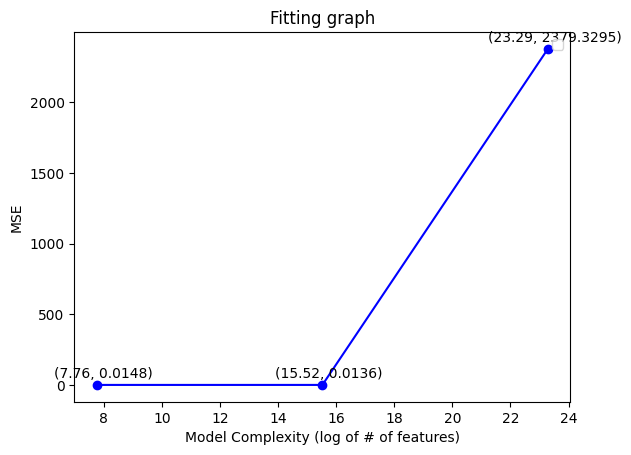

In [99]:
# Define your x and y points
# x = [1, 2, 3, 4, 5]
# y = [2, 3, 5, 7, 11]
print(X_train.shape)
x = [np.log(X_train.shape[0]), np.log(X_train.shape[0] ** 2), np.log(X_train.shape[0] ** 3)]
y = [mean_squared_error(y_test, yhat_test_predict), mean_squared_error(y_test, yhat_test_predict1), mean_squared_error(y_test, yhat_test_predict2)]
print(x)
print(y)
# Create the plot
plt.plot(x, y, marker='o', linestyle='-', color='b')

# Add labels, title, and legend
plt.xlabel('Model Complexity (log of # of features)')
plt.ylabel('MSE')
plt.title('Fitting graph')
plt.legend()

for i in range(len(x)):
    plt.annotate(f'({x[i].round(2)}, {y[i].round(4)})', (x[i].round(2), y[i].round(4)), textcoords="offset points", xytext=(5, 5), ha='center')

# Show the plot
plt.show()